## Notebook Magic

In [2]:
%matplotlib inline
%load_ext autoreload

## Imports

In [3]:
import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_parquet("s3://iefp-unemployment/intermediate/transform/intermediate.parquet")
df.shape

(145458, 94)

In [187]:
df.success.value_counts()

True     76934
False    68524
Name: success, dtype: int64

## Intervention exploration

In [193]:
interv_cols = [col for col in df.columns if "intervention" in col]
df_i = df[interv_cols].copy()

# Strip col names
df_i.columns = [col.replace("intervention_date_", "") for col in df_i.columns]

# Make df boolean
df_i = (df_i.notna()).astype('int')

# Filter for frequent interventions
frequent_i = df_i.mean()[df_i.mean() > 0.01].index.tolist()
df_i = df_i[frequent_i]

# Set output variable
df_i["ttj_sub_9"] = df["ttj_sub_9"]


In [194]:
df_i.head(5)

,208,225,226,319,416,427,506,507,611,7005,7017,772,777,785,796,9902,ttj_sub_9
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,True
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False


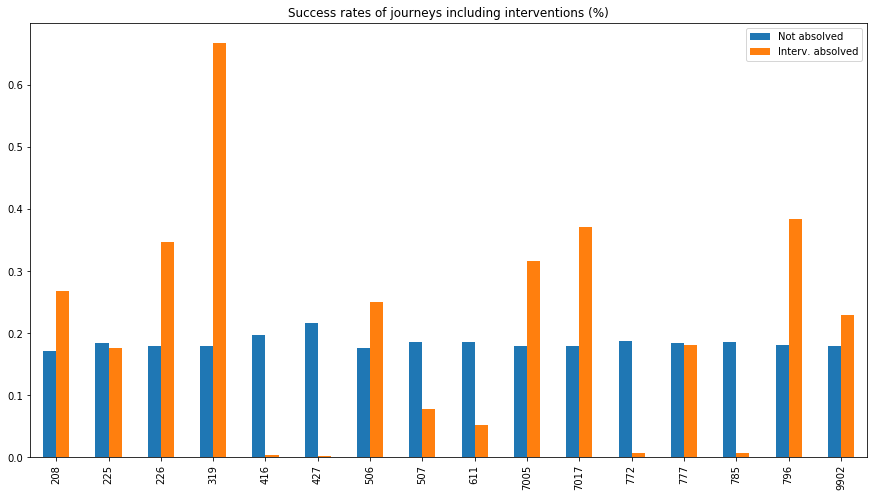

In [195]:
rates = pd.DataFrame() 
for col in df_i.columns:
    if "ttj" in col:
        continue
        
    success_rates = df_i.groupby(col)["ttj_sub_9"].mean().reset_index()
    success_rates = success_rates.T.iloc[1:]
    row = x.index[0]
    success_rates = success_rates.rename(index={last: col})
    success_rates.columns = ["Not absolved", "Interv. absolved"]
    rates = rates.append(success_rates)
    
rates.plot(kind="bar", figsize=(15,8), title="Success rates of journeys including interventions (%)");

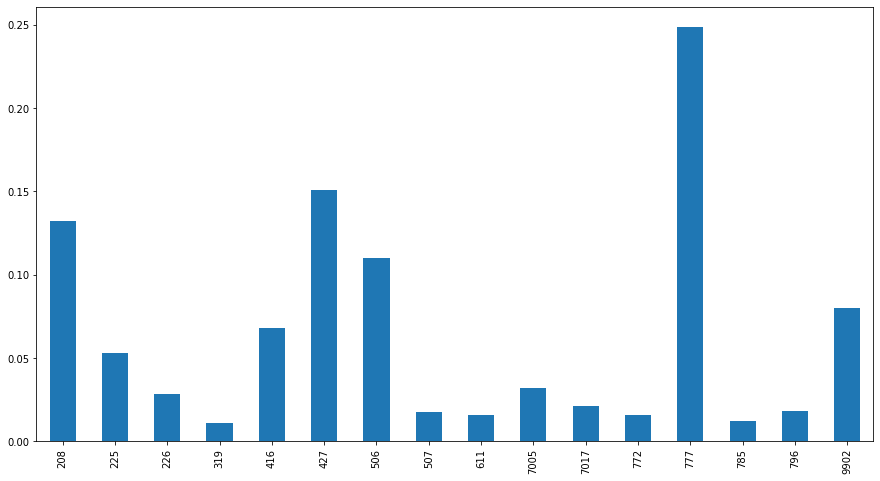

In [196]:
frequency = df_i.drop(["ttj_sub_9"], axis='columns').mean()
frequency.plot(kind="bar", figsize=(15,8))

In [186]:
df.loc[df.ttj_sub_9 == True ,interventions_cols].count().sort_values(ascending=False).plot(kind='bar', figsize=(16,8))

NameError: name 'interventions_cols' is not defined

In [181]:
df_i.shape

(145458, 17)

## Feature graphs

In [ ]:
data = 100 * df.groupby("civil_status")["ttj_sub_9"].mean()
sns.barplot(x="civil_status", y="ttj_sub_9", data=data.reset_index())

In [6]:
def plot_feat_outcome(df, feats, sorted=True, kind="bar"):
    fig, axs = plt.subplots(len(feats), 1, figsize=(20, 5 * len(feats)))
    plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.3)
    for i, feat in enumerate(feats):
        df[feat] = df[feat].fillna("NA")
        df_feat = 100 * df.groupby(feat)["ttj_sub_9"].mean()
        if sorted:
            df_feat = df_feat.sort_values(ascending=False)

        df_feat.plot(
            kind=kind,
            title="Employment rate (withing 9 month) of {} (%)".format(feat.title()),
            ax=axs[i],
        )

In [ ]:
plot_feat_outcome(df, ["gender", "civil_status"])

In [ ]:
plot_feat_outcome(df, ["professional_training", "profession_card"])

In [ ]:
plot_feat_outcome(df, ["school_qualification", "desired_location"])

In [ ]:
plot_feat_outcome(df, ["subsidy", "rsi"])

In [ ]:
plot_feat_outcome(df, ["desired_work_time", "desired_contract"])

In [ ]:
plot_feat_outcome(df, ["age", "previous_job_experience"], sorted=False, kind="line")

In [ ]:
plot_feat_outcome(df, ["dependents", "journey_count"], sorted=False, kind="bar")

In [ ]:
plot_feat_outcome(df, ["previous_cpp", "desired_cpp"], sorted=False)

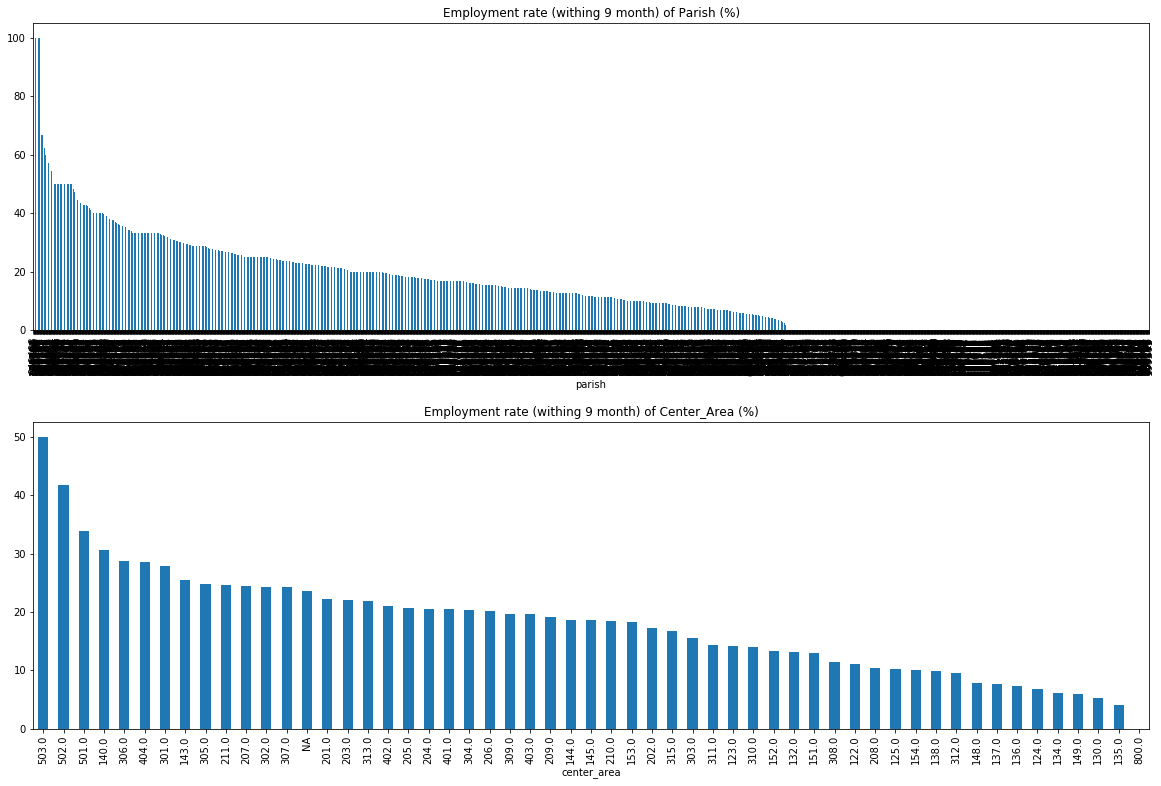

In [8]:
plot_feat_outcome(df, ["parish", "center_area"])

In [ ]:
plot_feat_outcome(df, ["registration_type", "college_qualification"])

TypeError: 'AxesSubplot' object does not support indexing

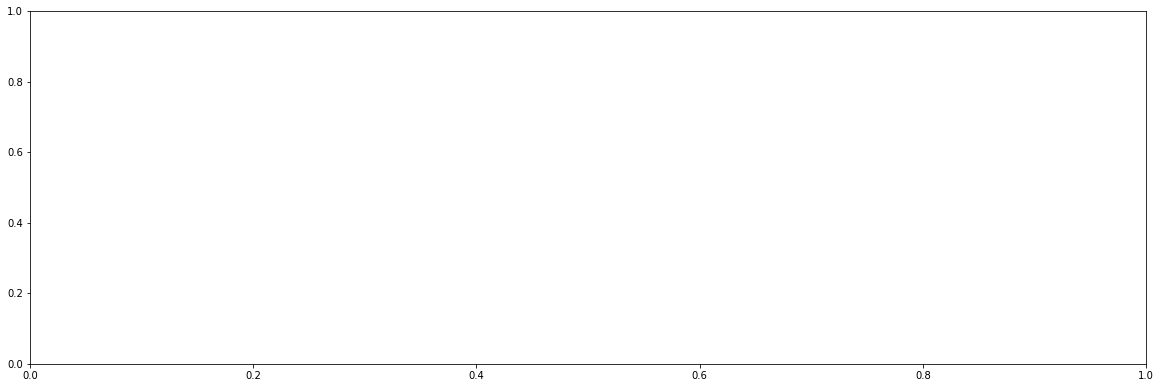

In [7]:
plot_feat_outcome(df, ["center_area"])